<table align="center">
  <tr>
    <td align="center">
      <a target="_blank" href="https://colab.research.google.com/github/jiapeish/mk-python-homework/blob/main/maku_python_homework_05.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png" height="60px" width="90px" style="padding-bottom:5px;" /><br/>
        点击此处在 Google Colab 直接运行
      </a>
    </td>
    <td align="center">
      <a target="_blank" href="https://github.com/jiapeish/mk-python-homework/blob/main/maku_python_homework_05.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png" height="60px" width="60px" style="padding-bottom:5px;" /><br/>
        点击此处在 GitHub 查看源码
      </a>
    </td>
  </tr>
</table>

In [1]:
import random
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)


2.18.1


## 1. 数据加载与预处理

In [8]:
(x_train_images, y_train_labels), (x_test_images, y_test_labels) = keras.datasets.mnist.load_data()
print("before expand train images shape:", x_train_images.shape)
x_train_images = (np.expand_dims(x_train_images, axis=-1) / 255.0).astype(np.float32)
y_train_labels = (y_train_labels).astype(np.int32)

x_test_images = (np.expand_dims(x_test_images, axis=-1) / 255.0).astype(np.float32)
y_test_labels = (y_test_labels).astype(np.int32)

print("train images shape:", x_train_images.shape)
print("test  images shape:", x_test_images.shape)

before expand train images shape: (60000, 28, 28)
train images shape: (60000, 28, 28, 1)
test  images shape: (10000, 28, 28, 1)


## 2. 模型构建

参考一下CNN模型的结构，对参数做一些调整
http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

In [9]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return cnn_model

cnn_model = build_cnn_model()
cnn_model.predict(x_train_images[[0]])
print(cnn_model.summary())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (1, 26, 26, 24)        │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 13, 13, 24)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 11, 11, 36)        │         7,812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (1, 5, 5, 36)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 900)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 128)               │       115,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 10)                │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,670 (486.99 KB)

 Trainable params: 124,670 (486.99 KB)

 Non-trainable params: 0 (0.00 B)

None


## 3. 模型训练

In [10]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train_images, y_train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8772 - loss: 0.4148
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9829 - loss: 0.0546
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9895 - loss: 0.0338
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9913 - loss: 0.0279
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9939 - loss: 0.0198


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
y_pred_probs shape: (10000, 10)
prediction label: 8
The dataset true label is: 8


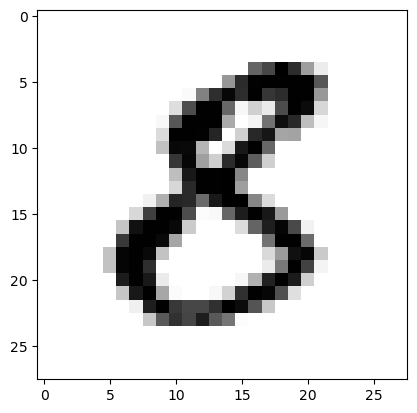

In [11]:
y_pred_probs = cnn_model.predict(x_test_images)
print("y_pred_probs shape:", y_pred_probs.shape)
y_pred_label = np.argmax(y_pred_probs[1234])
print("prediction label:", y_pred_label)

print("The dataset true label is:", y_test_labels[1234])
plt.imshow(x_test_images[1234,:,:,0], cmap=plt.cm.binary)

## 4. 性能评估

In [12]:
test_loss, test_accuracy = cnn_model.evaluate(x_test_images, y_test_labels)
print(f'The Model Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0368
The Model Test Accuracy: 0.9906


## 5. 模型保存

In [ ]:
cnn_model.save('mnist_model.h5')

## 对保存的文件进行校验

In [8]:
import h5py

with h5py.File('mnist_model.h5', 'r') as f:
    print("Keys in the HDF5 file:", list(f.keys()))

Keys in the HDF5 file: ['model_weights', 'optimizer_weights']


In [12]:
from keras.models import load_model

model = load_model('mnist_model.h5')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (1, 26, 26, 24)        │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 13, 13, 24)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 11, 11, 36)        │         7,812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (1, 5, 5, 36)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 900)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 128)               │       115,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 10)                │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,672 (487.00 KB)

 Trainable params: 124,670 (486.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)